<a href="https://colab.research.google.com/github/kozz84/random/blob/main/ATMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

#LOAD FILE AND MERGE INTO ONE DATAFRAME

In [2]:
df= pd.DataFrame()
dir='/content/drive/MyDrive/testcashmanagementdatascientisteuronet/'
for files in os.listdir(dir):
    if files.endswith(".csv"):
        temp = pd.read_csv(dir+files,sep=';',
                       parse_dates=[1],
                       index_col=[1]
                       )
        temp.rename(columns={'Withdrawal':temp['Atm'][0]},inplace=True)
        temp.drop(['Atm'],axis=1,inplace=True)
        df = pd.concat([df, temp], axis=1, join='outer')
df = df.reindex(sorted(df.columns), axis=1)

In [3]:
df.head(5)

,ATM1,ATM2,ATM3,ATM4,ATM5,ATM6,ATM7,ATM8,ATM9
ProcessDate,,,,,,,,,
2017-01-01,NaN,18200,100.0,46690.0,930.0,1400.0,NaN,117730.0,NaN
2017-01-02,31950.0,8790,10580.0,48820.0,5870.0,31120.0,14210.0,85920.0,11410.0
2017-01-03,18800.0,3620,15550.0,25520.0,2750.0,41870.0,20660.0,88720.0,14850.0
2017-01-04,16180.0,3820,8010.0,30290.0,3520.0,37180.0,13400.0,85080.0,10440.0
2017-01-05,39100.0,1590,14690.0,21680.0,NaN,40280.0,17940.0,84110.0,9410.0


Some data is missing. Without backkground information it's hard to choose the imputation method.

In [4]:
df.isna().sum()

ATM1    151
ATM2      0
ATM3      5
ATM4      6
ATM5      4
ATM6      3
ATM7     93
ATM8     16
ATM9     86
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,ATM1,ATM2,ATM3,ATM4,ATM5,ATM6,ATM7,ATM8,ATM9
ProcessDate,,,,,,,,,
2017-01-01,NaN,18200,100.0,46690.0,930.0,1400.0,NaN,117730.0,NaN
2017-01-05,39100.0,1590,14690.0,21680.0,NaN,40280.0,17940.0,84110.0,9410.0
2017-01-06,NaN,27440,990.0,27190.0,NaN,4030.0,NaN,149760.0,NaN
2017-01-08,NaN,8650,3650.0,12000.0,650.0,25500.0,18290.0,103680.0,11240.0
2017-01-22,NaN,9940,5230.0,39360.0,3150.0,10100.0,2500.0,135150.0,8880.0
...,...,...,...,...,...,...,...,...,...
2019-10-13,NaN,13980,NaN,48120.0,7810.0,18380.0,NaN,860.0,NaN
2019-10-15,48110.0,8850,37680.0,21510.0,15340.0,41260.0,9500.0,NaN,44450.0
2019-10-20,NaN,13030,11100.0,37400.0,6240.0,11190.0,NaN,1790.0,NaN


In [6]:
df.fillna(method='ffill',inplace=True)
df.fillna(method='bfill',inplace=True)

In [7]:
df.isna().sum()

ATM1    0
ATM2    0
ATM3    0
ATM4    0
ATM5    0
ATM6    0
ATM7    0
ATM8    0
ATM9    0
dtype: int64

#Data Analysis

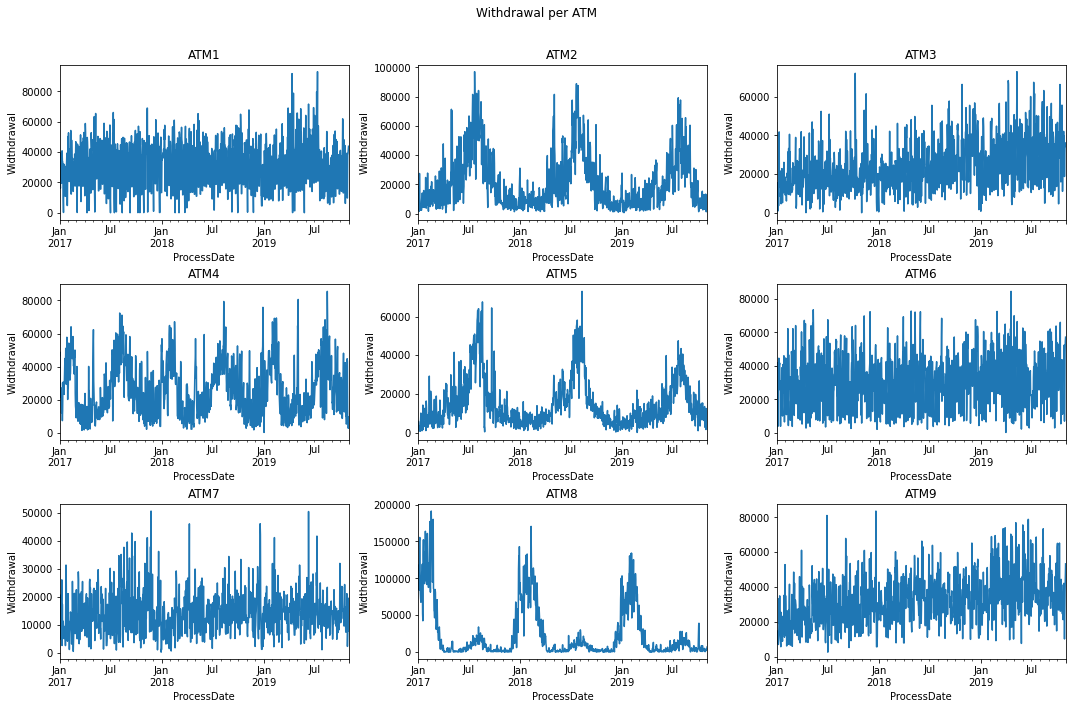

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
fig.suptitle('Withdrawal per ATM')
for i, ax in zip(df, axs.ravel()):
    df[i].plot(ax=ax,title=i)
    ax.set_xlabel('ProcessDate')
    ax.set_ylabel('Widthdrawal')
    #ax.set_ylim([df.min().min(), df.max().max()])
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

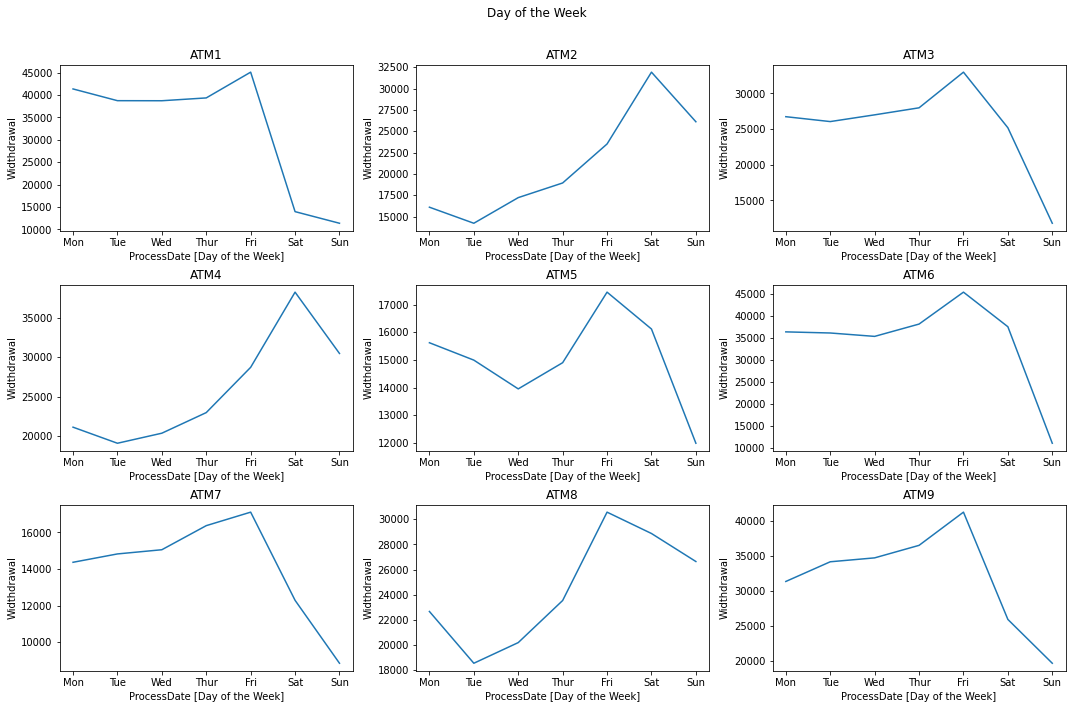

In [9]:
df_dayoftheweek = df.groupby(df.index.dayofweek).mean()
day_digit = [0,1,2,3,4,5,6]
day_word = 'Mon Tue Wed Thur Fri Sat Sun'.split()
dict_dayofweek = dict(zip(day_digit, day_word))
df_dayoftheweek =df_dayoftheweek.rename(index=dict_dayofweek)


fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
fig.suptitle('Day of the Week')
for i, ax in zip(df, axs.ravel()):
    df_dayoftheweek[i].plot(ax=ax,title=i)
    ax.set_xlabel('ProcessDate [Day of the Week]')
    ax.set_ylabel('Widthdrawal')
    #ax.set_ylim([df.groupby(df.index.dayofweek).mean().min().min(),df.groupby(df.index.dayofweek).mean().max().max()])
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

The vast majority of ATMs show a drop in withdraws on Saturday and Sunday.

Biggest drop can be obsevered in order for ATM1, ATM6,ATM9.

ATM4 and ATM2 show a steady increase from Monday to Saturday.

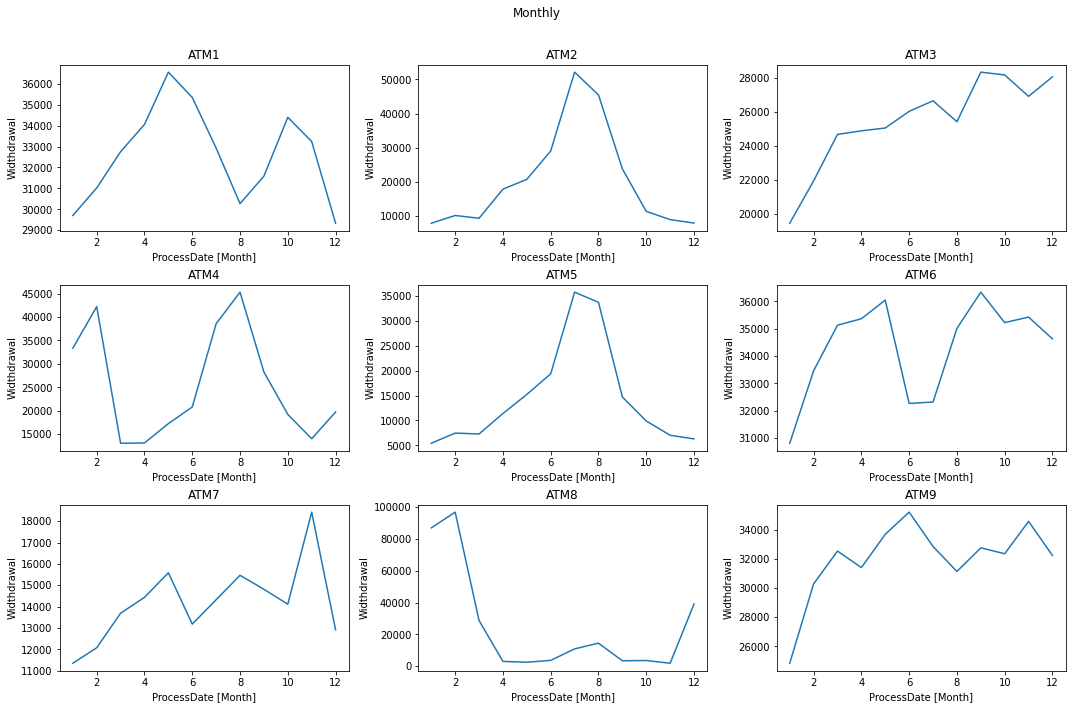

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
fig.suptitle('Monthly')
for i, ax in zip(df, axs.ravel()):
    df.groupby(df.index.month).mean()[i].plot(ax=ax,title=i)
    ax.set_xlabel('ProcessDate [Month]')
    ax.set_ylabel('Widthdrawal')
    #ax.set_ylim([df.groupby(df.index.month).mean().min().min(),df.groupby(df.index.month).mean().max().max()])
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

ATM2, ATM4,ATM5, ATM8 show annual seasonality.

ATM2 and ATM5 show increase in withdraw in July/August.

ATM4 and ATM8 show increase in withdraw in July/August as well as December-February.

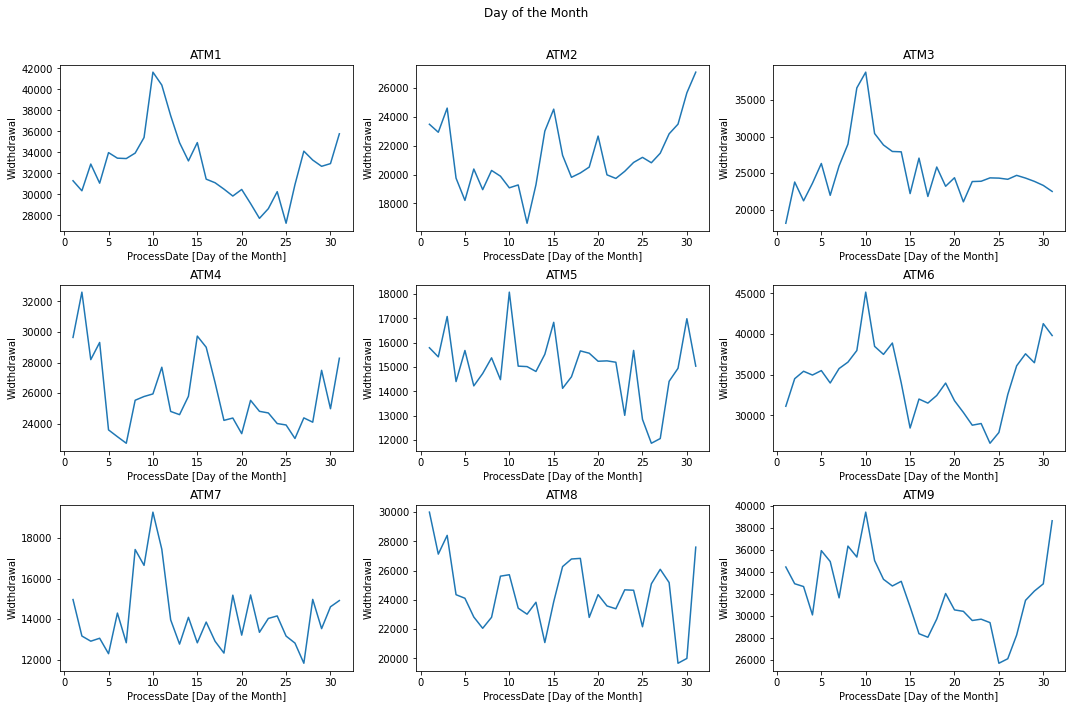

In [11]:
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
fig.suptitle('Day of the Month')
for i, ax in zip(df, axs.ravel()):
    df.groupby(df.index.day).mean()[i].plot(ax=ax,title=i)
    ax.set_xlabel('ProcessDate [Day of the Month]')
    ax.set_ylabel('Widthdrawal')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.show()

#Timeseries prediction

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
#for i in df.columns:
#    results = seasonal_decompose(df[i][-365:],model='additive')
#    results.plot();

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
def fitting():
    fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
    score_es = []
    for i, ax in zip(df.columns, axs.ravel()):
        train = df[i].iloc[:-30]
        test = df[i].iloc[-30:]
        model = ExponentialSmoothing(
                    train,
                    trend='add',
                    seasonal='add',
                    seasonal_periods=7
                     ).fit()
        pred = model.forecast(60)
        ax.title.set_text(i)
        ax.tick_params(labelrotation=45)
        ax.plot(test)
        ax.plot(pred)
        MAE = mean_absolute_error(pred[0:30],test)
        MAPE = mean_absolute_percentage_error(pred[0:30],test)
        MSE = mean_squared_error(pred[0:30],test)
        RMSE = MSE**0.5
        score_es.append([i,MAE, MAPE,MSE,RMSE])
    fig.tight_layout()
    fig.show()
    score_es = pd.DataFrame(score_es, columns=['ATM','Mean absolute error','Mean absolute percentage error','Mean squared error','Root-mean-square deviation'])
    return score_es
        

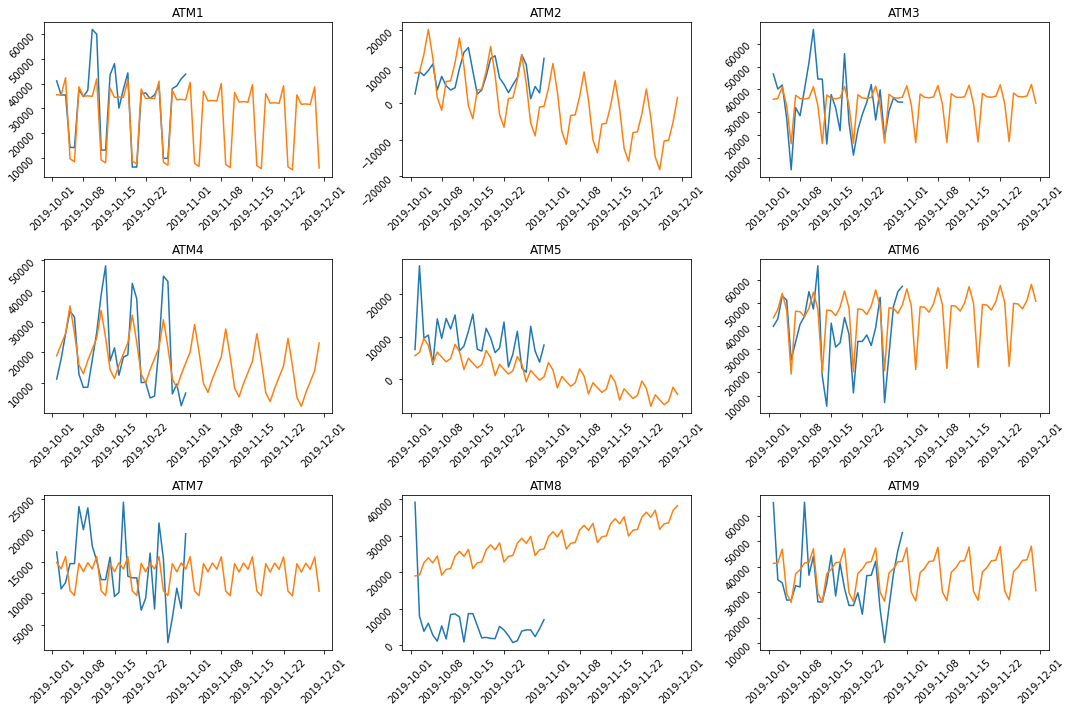

In [17]:
score_es = fitting()

In [18]:
score_es

,ATM,Mean absolute error,Mean absolute percentage error,Mean squared error,Root-mean-square deviation
0,ATM1,5047.951706,0.223678,5.806939e+07,7620.327683
1,ATM2,5636.506734,2.324204,5.308115e+07,7285.680833
2,ATM3,8831.480424,0.292916,1.286596e+08,11342.820202
3,ATM4,6686.306998,0.352016,7.865475e+07,8868.751439
4,ATM5,5519.830875,2.851863,4.807820e+07,6933.844827
5,ATM6,10207.147494,0.241549,1.676872e+08,12949.408433
6,ATM7,4684.843779,0.356931,2.854972e+07,5343.193627
7,ATM8,20282.967373,0.827992,4.285176e+08,20700.667470
8,ATM9,7805.875253,0.202890,1.021904e+08,10108.926614


[Text(0.5, 1.0, 'ExponentialSmoothing')]

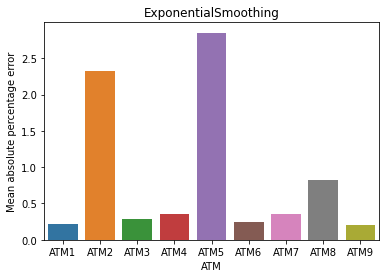

In [20]:
sns.barplot(data=score_es,x='ATM',y='Mean absolute percentage error').set(title='ExponentialSmoothing')

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#from pmdarima import auto_arima
#for i in df.columns:
#    print(auto_arima(df[i], seasonal=True,m=7).summary())

In [22]:
params = {
        'ATM1':[(2,0,3),(2,0,[1],7)],
        'ATM2': [(5,0,3),(2,0,[1,2],7)],
        'ATM3':[(5,1,0),(2,0,[1],7)],
        'ATM4':[(1,0,0),(2,0,[1],7)],
        'ATM5':[(3,0,3),(2,0,[1,2],7)],
        'ATM6': [(5, 1, 2),(1, 0, [1], 7)],
        'ATM7':[(2, 0, 3),(2, 0, [1], 7)],
        'ATM8':[(4, 1, 3),(1, 0, [1], 7)],
        'ATM9':[(0, 1, 2),(0, 0, 2, 7)]
          }

In [23]:
def fitting():
    fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
    score_sarimax = []
    for i, ax in zip(df.columns, axs.ravel()):
        train = df[i].iloc[:-30]
        test = df[i].iloc[-30:]
        model = SARIMAX(train,order=params[i][0],seasonal_order=params[i][1]).fit()
        pred = model.forecast(60)
        ax.title.set_text(i)
        ax.tick_params(labelrotation=45)
        ax.plot(test)
        ax.plot(pred)
        MAE = mean_absolute_error(pred[0:30],test)
        MAPE = mean_absolute_percentage_error(pred[0:30],test)
        MSE = mean_squared_error(pred[0:30],test)
        RMSE = MSE**0.5
        score_sarimax.append([i,MAE, MAPE,MSE,RMSE])
    fig.tight_layout()
    fig.show()
    score_sarimax = pd.DataFrame(score_sarimax, columns=['ATM','Mean absolute error','Mean absolute percentage error','Mean squared error','Root-mean-square deviation'])
    return score_sarimax

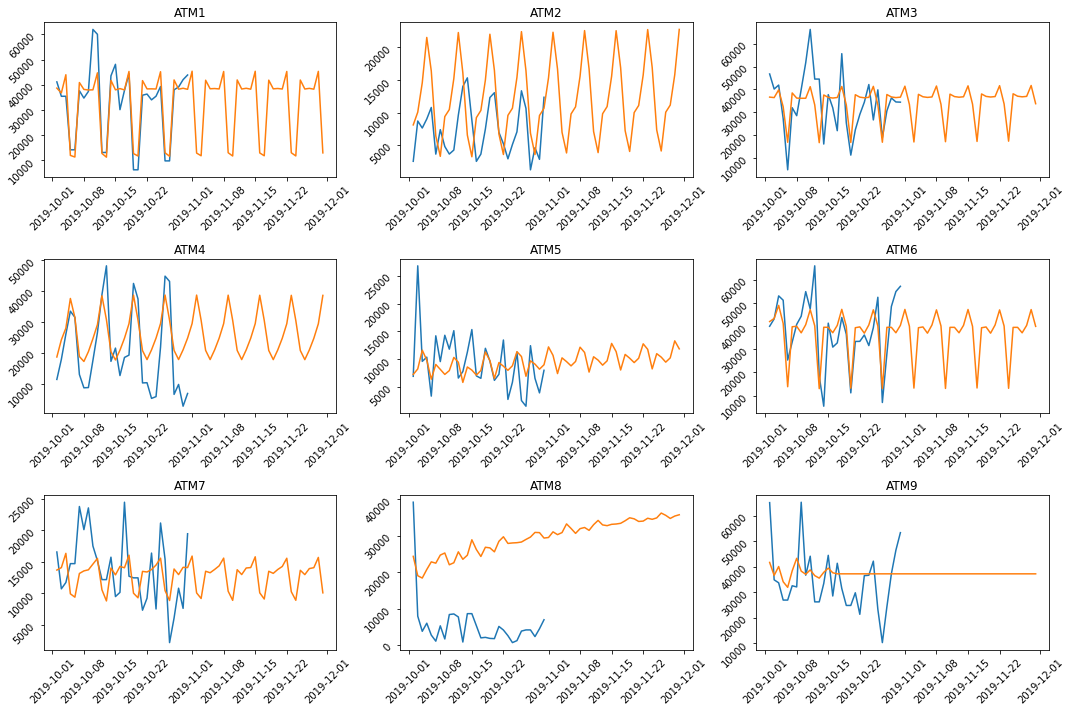

In [24]:
score_sarimax = fitting()

In [25]:
score_sarimax

,ATM,Mean absolute error,Mean absolute percentage error,Mean squared error,Root-mean-square deviation
0,ATM1,4646.956324,0.162818,4.502815e+07,6710.301517
1,ATM2,5877.465950,0.567233,4.476751e+07,6690.852775
2,ATM3,8881.112815,0.291232,1.282744e+08,11325.830160
3,ATM4,8416.161666,0.361376,9.842417e+07,9920.895420
4,ATM5,3423.424148,0.407236,2.437545e+07,4937.149854
5,ATM6,8325.131123,0.249274,1.250607e+08,11183.052210
6,ATM7,4780.543349,0.377299,2.923566e+07,5407.000731
7,ATM8,21373.905387,0.820922,4.786636e+08,21878.381130
8,ATM9,9189.654201,0.243595,1.349992e+08,11618.913942


[Text(0.5, 1.0, 'SARIMAX')]

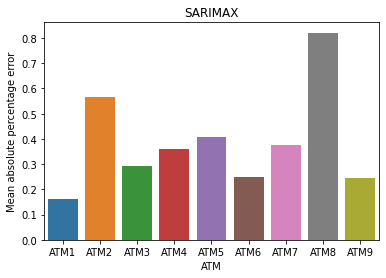

In [33]:
sns.barplot(data=score_sarimax,x='ATM',y='Mean absolute percentage error').set(title='SARIMAX')